In [84]:
import gpxpy
import pandas as pd
import itertools
import requests
import json
from scipy.signal import medfilt
%pylab inline

def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = itertools.tee(iterable)
    next(b, None)
    return zip(a, b)

f = open('mountainBiking-Fr. Apr. 24 15:47:34 2020-18.0km.gpx')
gpx = gpxpy.parse(f)

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [27]:
len(gpx.tracks[0].segments[0].points)

5232

In [28]:
data = pd.DataFrame(columns=["long","lat","ele","t"])
for p in gpx.tracks[0].segments[0].points:
    data = data.append({"long": p.longitude, "lat": p.latitude, "ele": p.elevation, "t": p.time}, ignore_index=True)

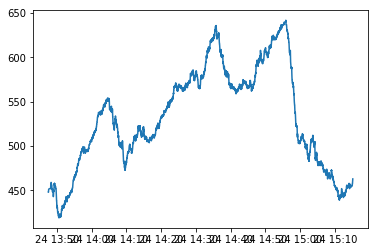

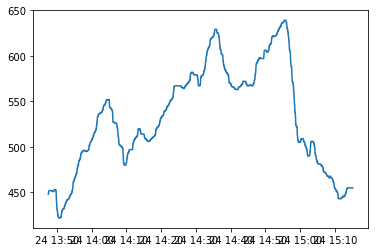

In [93]:
figure(1)
plot(data["t"], data["ele"])
figure(2)
plot(data["t"], medfilt(data["ele"], 59))

In [94]:
up = 0
down = 0
for e1,e2 in pairwise(data["ele"]):
    if e1 > e2:
        down += e1 - e2
    elif e2 > e1:
        up += e2 - e1
        
print("Up: {0}; Down: {1}".format(up, down))

up = 0
down = 0
for e1,e2 in pairwise(medfilt(data["ele"],59)):
    if e1 > e2:
        down += e1 - e2
    elif e2 > e1:
        up += e2 - e1
        
print("Up: {0}; Down: {1}".format(up, down))

Up: 1608.0; Down: 1593.0
Up: 439.0; Down: 432.0


In [69]:
up = 0
last = data["ele"][0]
for e in data["ele"]:
    if last < e:
        up += e - last
    last = e
print(up)

1608.0


In [79]:
geoData = { "locations": [ { "latitude": data["long"][0], "longitude": data["lat"][0] } ] }
resp = requests.post('https://api.open-elevation.com/api/v1/lookup', json=geoData)